# Fractional Brownian Motion

In this notebook we let the midprice process follow a fractional Brownian motion. There is no closed-form solution of what the optimal execution strategy is in this case. As we will see, the signature method learns to exploit the memory-effect of fBM.

In [1]:
import base

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from data.fbm import FBM
import optimiser
import utils

## Define parameters and simulate paths

We now set the parameters of the parameters of the optimal execution problem.

In [2]:
params = {
    "N": 2,
    "order": 7,
    "q0": 1.,
    "k":  1e-4,
    "Lambda": 1e-3,
    "alpha": 0.1,
    "phi": 0,
}

We sample from a fBM with a given Hurst parameter H.

In [3]:
H = 1/3.
process = FBM(H=H)
paths, ES = process.build(n_paths=50000, order=params["order"])

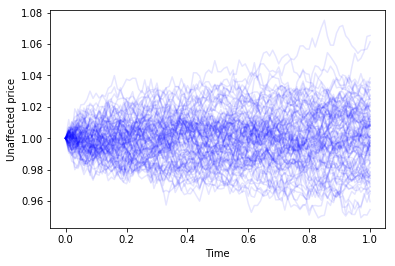

In [4]:
plt.plot(*paths[:100].T, "b", alpha=0.1)
plt.xlabel("Time")
plt.ylabel("Unaffected price")
plt.show()

## Solve

We solve, and time, the optimal execution problem using the signature method. As we see, the signature method is quick to train.

In [5]:
%%time

l = optimiser.optimise(ES, **params)


CPU times: user 230 ms, sys: 164 ms, total: 394 ms
Wall time: 99 ms


## Evaluate

The found signature strategy is then evaluated to check its performance.

In [6]:
sample = paths[:100]

speeds, inventories, wealths = utils.get_analytics(utils.sig_speed(l, params["N"]),
                                                   sample, **params)

Observe that the signature strategy speculates on the asset by leveraging the memory effect of fractional Brownian motions.

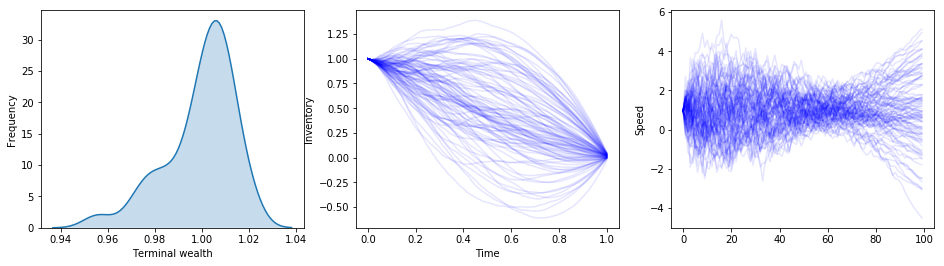

In [7]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.kdeplot(wealths, shade=True)
plt.xlabel("Terminal wealth")
plt.ylabel("Frequency")


plt.subplot(1, 3, 2)
for Q in inventories:
    plt.plot(np.linspace(0, 1, len(Q)), Q, "b", alpha=0.1)
plt.ylabel("Inventory")
plt.xlabel("Time")

plt.subplot(1, 3, 3)
for speed in speeds:
    plt.plot(speed, "b", alpha=0.1)
plt.ylabel("Speed")

plt.show()